<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Estudo-python/blob/main/Eq_Arrhenius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Linearizando a equação de Arrhenius***

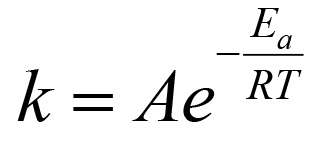

In [1]:
from IPython.display import Image
Image(filename='formula.jpg')

In [2]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
#Importando os dados do excel
df = pd.read_excel("/content/Dados arr.xlsx") 
data = df.to_numpy() #Covertendo os dados em np
#Definindo os eixos
x = data[:,0]
y = data[:,1]

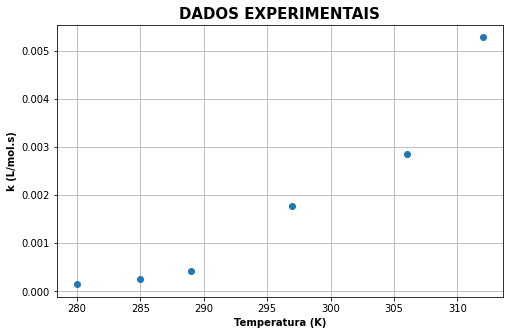

In [4]:
#Plotando os dados experimentais
f = plt.figure()     
ax = f.add_subplot(111)  
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)   
Dados = ax.plot(x,y, 'o', label='Dados')
ax.set_title("DADOS EXPERIMENTAIS", weight ='bold')  
ax.set_xlabel('Temperatura (K)',weight='bold')               
ax.set_ylabel('k (L/mol.s)', weight='bold')
ax.grid(True)  
f.set_figheight(5)                                                 
f.set_figwidth(8)          
plt.show()

***Para poder lineraizar a equação é preciso passa-la para o modelo de uma reta, ficando como:***


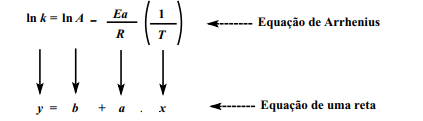

In [5]:
Image(filename='equação-de-arrhenius-4.png')

*Sendo assim os dados também devem ser ajustados para coincidir com o novo modelo da equação*

In [6]:
#Ajustando os valores de x e y para o novo modelo
x = 1 / x
y = np.log(y)
print(x)
print(y)

[0.00357143 0.00350877 0.00346021 0.003367   0.00326797 0.00320513]
[-8.83877682 -8.22452358 -7.74708497 -6.33114191 -5.86078722 -5.24401859]


In [7]:
#Criando o modelo da reta 
a, b, r, p_value, std_err = stats.linregress(x, y) 

mod_y = a * x + b

In [8]:
print('O coeficiente angular da reta é {:.4f}'.format(a))
print('O coeficiente linear da reta é {:.4f}'.format(b))
print('O coeficiente de determinação é {:.4f}'.format(r**2))

O coeficiente angular da reta é -9961.5459
O coeficiente linear da reta é 26.7958
O coeficiente de determinação é 0.9798


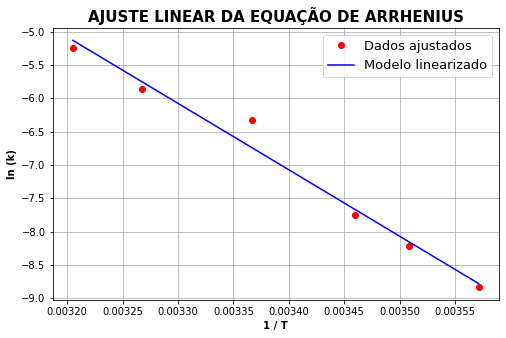

In [9]:
#Plotando o modelo ajustado
f1 = plt.figure()     
ax1 = f1.add_subplot(111)
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)
l1 = ax1.plot(x, y, marker ='o',color = 'red', label = 'Dados ajustados', linestyle = '')
l2 = ax1.plot(x, mod_y, color = 'blue', label = 'Modelo linearizado')
ax1.set_title("AJUSTE LINEAR DA EQUAÇÃO DE ARRHENIUS", weight ='bold')  
ax1.set_xlabel('1 / T',weight='bold')               
ax1.set_ylabel('ln (k)', weight='bold')
plt.rc('legend', fontsize=13) 
ax1.legend()
ax1.grid(True)
f1.set_figheight(5)                                                 
f1.set_figwidth(8)
plt.savefig('Modelo_linear_Arrhenius', dpi=400)
plt.show()

In [10]:
#Salvando os resultados no Excel
df_concents= pd.DataFrame({'Valores de x': x, 'Valores de y':y, 'y do modelo':mod_y, 'coeficiente angular':a, 'coeficiente linear':b})
with pd.ExcelWriter('Saída_de_dados_linear_Arrhenius.xlsx') as writer:
    df_concents.to_excel(writer, sheet_name="Output_concent")
    writer.save()